In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import imblearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import StratifiedShuffleSplit


### Funçao (metrics) para cálculo de métricas: acurácia, recall, precisão

In [2]:
def metrics (y_test, y_pred):
  ac = accuracy_score(y_test, y_pred)
  rec = recall_score(y_test,y_pred, average= 'weighted')
  prec = precision_score(y_test,y_pred, average='weighted')
  return (ac, rec, prec)

# Tratamento do conjunto de dados

In [3]:
# Define random state
random_state = 2018
np.random.seed(random_state)
warnings.filterwarnings('ignore')

pd.options.display.max_rows = 6000
pd.options.display.max_columns = 80

data = pd.read_csv('./brazilian-cities/BRAZIL_CITIES.csv', sep=";", decimal=",")

##note que a df está sem a feature AREA e RURAL_URBAN

ft1 = ["IBGE_RES_POP", "IBGE_RES_POP_BRAS", "IBGE_RES_POP_ESTR", "IBGE_DU", "IBGE_DU_URBAN", "IBGE_DU_RURAL", "IBGE_POP", "IBGE_1", "IBGE_1-4", "IBGE_5-9", "IBGE_10-14", "IBGE_15-59", "IBGE_60+", "IBGE_PLANTED_AREA", "IBGE_CROP_PRODUCTION_$", "IDHM Ranking 2010", "IDHM", "IDHM_Renda", "IDHM_Longevidade", "IDHM_Educacao", "LONG", "LAT", "ALT", "PAY_TV", "FIXED_PHONES", "ESTIMATED_POP", "GVA_AGROPEC", "GVA_INDUSTRY", "GVA_SERVICES", "GVA_PUBLIC", "TAXES", "GDP", "POP_GDP", "GDP_CAPITA", "MUN_EXPENDIT", "COMP_TOT", "COMP_A", "COMP_B", "COMP_C", "COMP_D", "COMP_E", "COMP_F", "COMP_G", "COMP_H", "COMP_I", "COMP_J", "COMP_K", "COMP_L", "COMP_M", "COMP_N", "COMP_O", "COMP_P", "COMP_Q", "COMP_R", "COMP_S", "COMP_T", "COMP_U", "HOTELS", "BEDS", "Pr_Agencies", "Pu_Agencies", "Pr_Bank", "Pu_Bank", "Pr_Assets", "Pu_Assets", "Cars", "Motorcycles", "Wheeled_tractor", "UBER", "MAC", "WAL-MART", "POST_OFFICES"]
df1 = data[ft1]

ft = ["IBGE_RES_POP", "IBGE_RES_POP_BRAS", "IBGE_RES_POP_ESTR", "IBGE_DU", "IBGE_DU_URBAN", "IBGE_DU_RURAL", "IBGE_POP", "IBGE_1", "IBGE_1-4", "IBGE_5-9", "IBGE_10-14", "IBGE_15-59", "IBGE_60+", "IBGE_PLANTED_AREA", "IBGE_CROP_PRODUCTION_$","LONG", "LAT" ,"ALT", "PAY_TV", "FIXED_PHONES", "ESTIMATED_POP", "GVA_AGROPEC", "GVA_INDUSTRY", "GVA_SERVICES", "GVA_PUBLIC", "TAXES", "GDP", "POP_GDP", "MUN_EXPENDIT", "COMP_TOT", "COMP_A", "COMP_B", "COMP_C", "COMP_D", "COMP_E", "COMP_F", "COMP_G", "COMP_H", "COMP_I", "COMP_J", "COMP_K", "COMP_L", "COMP_M", "COMP_N", "COMP_O", "COMP_P", "COMP_Q", "COMP_R", "COMP_S", "COMP_T", "COMP_U", "HOTELS", "BEDS", "Pr_Agencies", "Pu_Agencies", "Pr_Bank", "Pu_Bank", "Pr_Assets", "Pu_Assets", "Cars", "Motorcycles", "Wheeled_tractor", "UBER", "MAC", "WAL-MART", "POST_OFFICES"]
df = data[ft]

features = ["POPULAÇÃO RESIDENTE", "POPULAÇÃO BRASILEIRA RESIDENTE", "POPULAÇÃO ESTRANGEIRA RESIDENTE", "TOTAL DE UNIDADES DOMÉSTICAS", "UNIDADES DOMÉSTICAS URBANAS", "UNIDADES DOMÉSTICAS RURAIS", "POPULAÇÃO RESIDENTE PLANJAMENTO URB REGULAR", "POPULAÇÃO RESIDENTE PLANJAMENTO URB REGULAR [ATÉ 1 ANO]", "POPULAÇÃO RESIDENTE PLANJAMENTO URB REGULAR [DE 1 A 4 ANOS]", "POPULAÇÃO RESIDENTE PLANJAMENTO URB REGULAR [DE 4 A 9 ANOS]", "POPULAÇÃO RESIDENTE PLANJAMENTO URB REGULAR [DE 10 A 14 ANOS]", "POPULAÇÃO RESIDENTE PLANJAMENTO URB REGULAR [DE 15 A 59 ANOS]", "POPULAÇÃO RESIDENTE PLANJAMENTO URB REGULAR [60+ ANOS]", "ÁREA PLANTADA EM HECTARES", "SAFRA (R$1000)","LONGITUDE", "LATITUDE", "ALTITUDE [ELEVAÇÃO DA CIDADE EM METROS]", "TV PAGA", "USUÁRIOS DE TELEFONE FIXO", "POPULAÇÃO ESTIMADA", "VALOR AGREGADO BRUTO [AGROPECUÁRIA]", "VALOR AGREGADO BRUTO [INDÚSTRIA]", "VALOR AGREGADO BRUTO [SERVIÇOS]", "VALOR AGREGADO BRUTO [SERVIÇOS PÚBLICOS]", "IMPOSTOS", "PIB", "POPULAÇÃO", "PRODUTO INTERNO BRUTO PER CAPITA", "DESPESAS MUNICIPAIS", "N.º TOTAL DE EMPRESAS", "N.º DE EMPRESAS AGRICULTURA, PECUÁRIA, PECUÁRIA", "N.º DE EMPRESAS EXTRATIVAS", "N.º DE EMPRESAS INDUSTRIAS DE TRANFORMAÇÃO", "N.º DE EMPRESAS ELETRICIDADE E GÁS", "N.º DE EMPRESAS ÁGUA, ESGOTO, GESTÃO DE RESÍDUOS", "N.º DE EMPRESAS CONSTRUÇÃO", "N.º DE EMPRESAS REPARAÇÃO DE VEÍCULOS MOTORIZADOS E MOTOS", "N.º DE EMPRESAS TRANSPORTE ARMAZENAMENTO E CORREIO", "N.º DE EMPRESAS HOSPEDAGEM E ALIMENTAÇÃO", "N.º DE EMPRESAS INFORMAÇÃO COMUNICAÇÃO", "N.º DE EMPRESAS FINANCEIRAS SEGUROS", "N.º DE EMPRESAS IMOBILIÁRIAS", "N.º DE EMPRESAS CIENTÍFICAS E TÉCNICAS", "N.º DE EMPRESAS ADMINISTRATIVAS E SERVIÇOS COMPLEMENTARES", "N.º DE EMPRESAS ADM PÚBLICA DEFESA E SEGURIDADE SOCIAL", "N.º DE EMPRESAS EDUCAÇÃO", "N.º DE EMPRESAS SAÚDE HUMADA E SERVIÇOS SOCIAS", "N.º DE EMPRESAS ARTE CULTURA ESPORTE E LAZER", "N.º DE EMPRESAS OUTRAS ATIVIDADES E SERVIÇOS", "N.º DE EMPRESAS SERVIÇOS DOMÉSTICOS", "N.º DE INSTITUIÇÕES INTERNACIONAIS E EXTRATERRITORIAIS", "HOTEIS", "N.º TOTAL DE CAMAS DE HOTEL", "N.º TOTAL DE AG. BANCÁRIAS PRIVADAS", "N.º TOTAL DE AG. BANCÁRIAS PÚBLICAS", "N.º TOTAL DE BANCOS PRIVADOS", "N.º TOTAL DE AG. BANCOS PÚBLICOS", "TOTAL DE ATIVOS DE BANCOS PRIVADOS", "TOTAL DE ATIVOS DE BANCOS PÚBLICOS", "CARROS", "MOTOCICLETAS", "NÚMERO TOTAL DE TRATORES DE RODAS", "UBER", "N.º TOTAL DE MC DONALDS", "WAL-MART", "N.º TOTAL DE AG DOS CORREIOS"]

df['LONG'] = df['LONG'].astype(float)
df['LAT'] = df['LAT'].astype(float)
df['ALT'] = df['ALT'].astype(float)
#df['AREA'] = df['AREA'].astype(float)
#df['RURAL_URBAN'] = df['RURAL_URBAN'].astype(float)
df['GVA_AGROPEC'] = df['GVA_AGROPEC'].astype(float)
df['GVA_INDUSTRY'] = df['GVA_INDUSTRY'].astype(float)
df['GVA_SERVICES'] = df['GVA_SERVICES'].astype(float)
df['GVA_PUBLIC'] = df['GVA_PUBLIC'].astype(float)
df['TAXES'] = df['TAXES'].astype(float)
df['GDP'] = df['GDP'].astype(float)
#df['GDP_CAPITA'] = df['GDP_CAPITA'].astype(float)

# Definição de classes

In [4]:
df1['IDHM'] = df1['IDHM'].astype(float)

def get_rotulo(value):
    if value >= 0.8:
        return "muito_alto"
    elif 0.69 < value <= 0.79:
        return "alto"
    elif 0.59 < value <= 0.69:
        return "médio"
    elif 0.49 < value <= 0.59:
        return "baixo"
    else:
        return "muito_baixo"

df["rótulo"] = df1['IDHM'].apply(get_rotulo)
df=  df.fillna(0)
#separação da classe em y
X = df.iloc[:, 0:65].values
y = df.iloc[:, 66].values


# Aplicação do algoritmo de floresta aleatória

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#100 árvores
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = model.score(X_test, y_test)
print('Score do Modelo --> %s' %score)



Score do Modelo --> 0.7942583732057417


### Classification report

In [6]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        alto       0.84      0.88      0.86       625
       baixo       0.79      0.73      0.76       364
  muito_alto       0.40      0.27      0.32        15
 muito_baixo       1.00      0.07      0.13        14
       médio       0.75      0.77      0.76       654

    accuracy                           0.79      1672
   macro avg       0.76      0.55      0.57      1672
weighted avg       0.79      0.79      0.79      1672



# Importância de Cada Feature

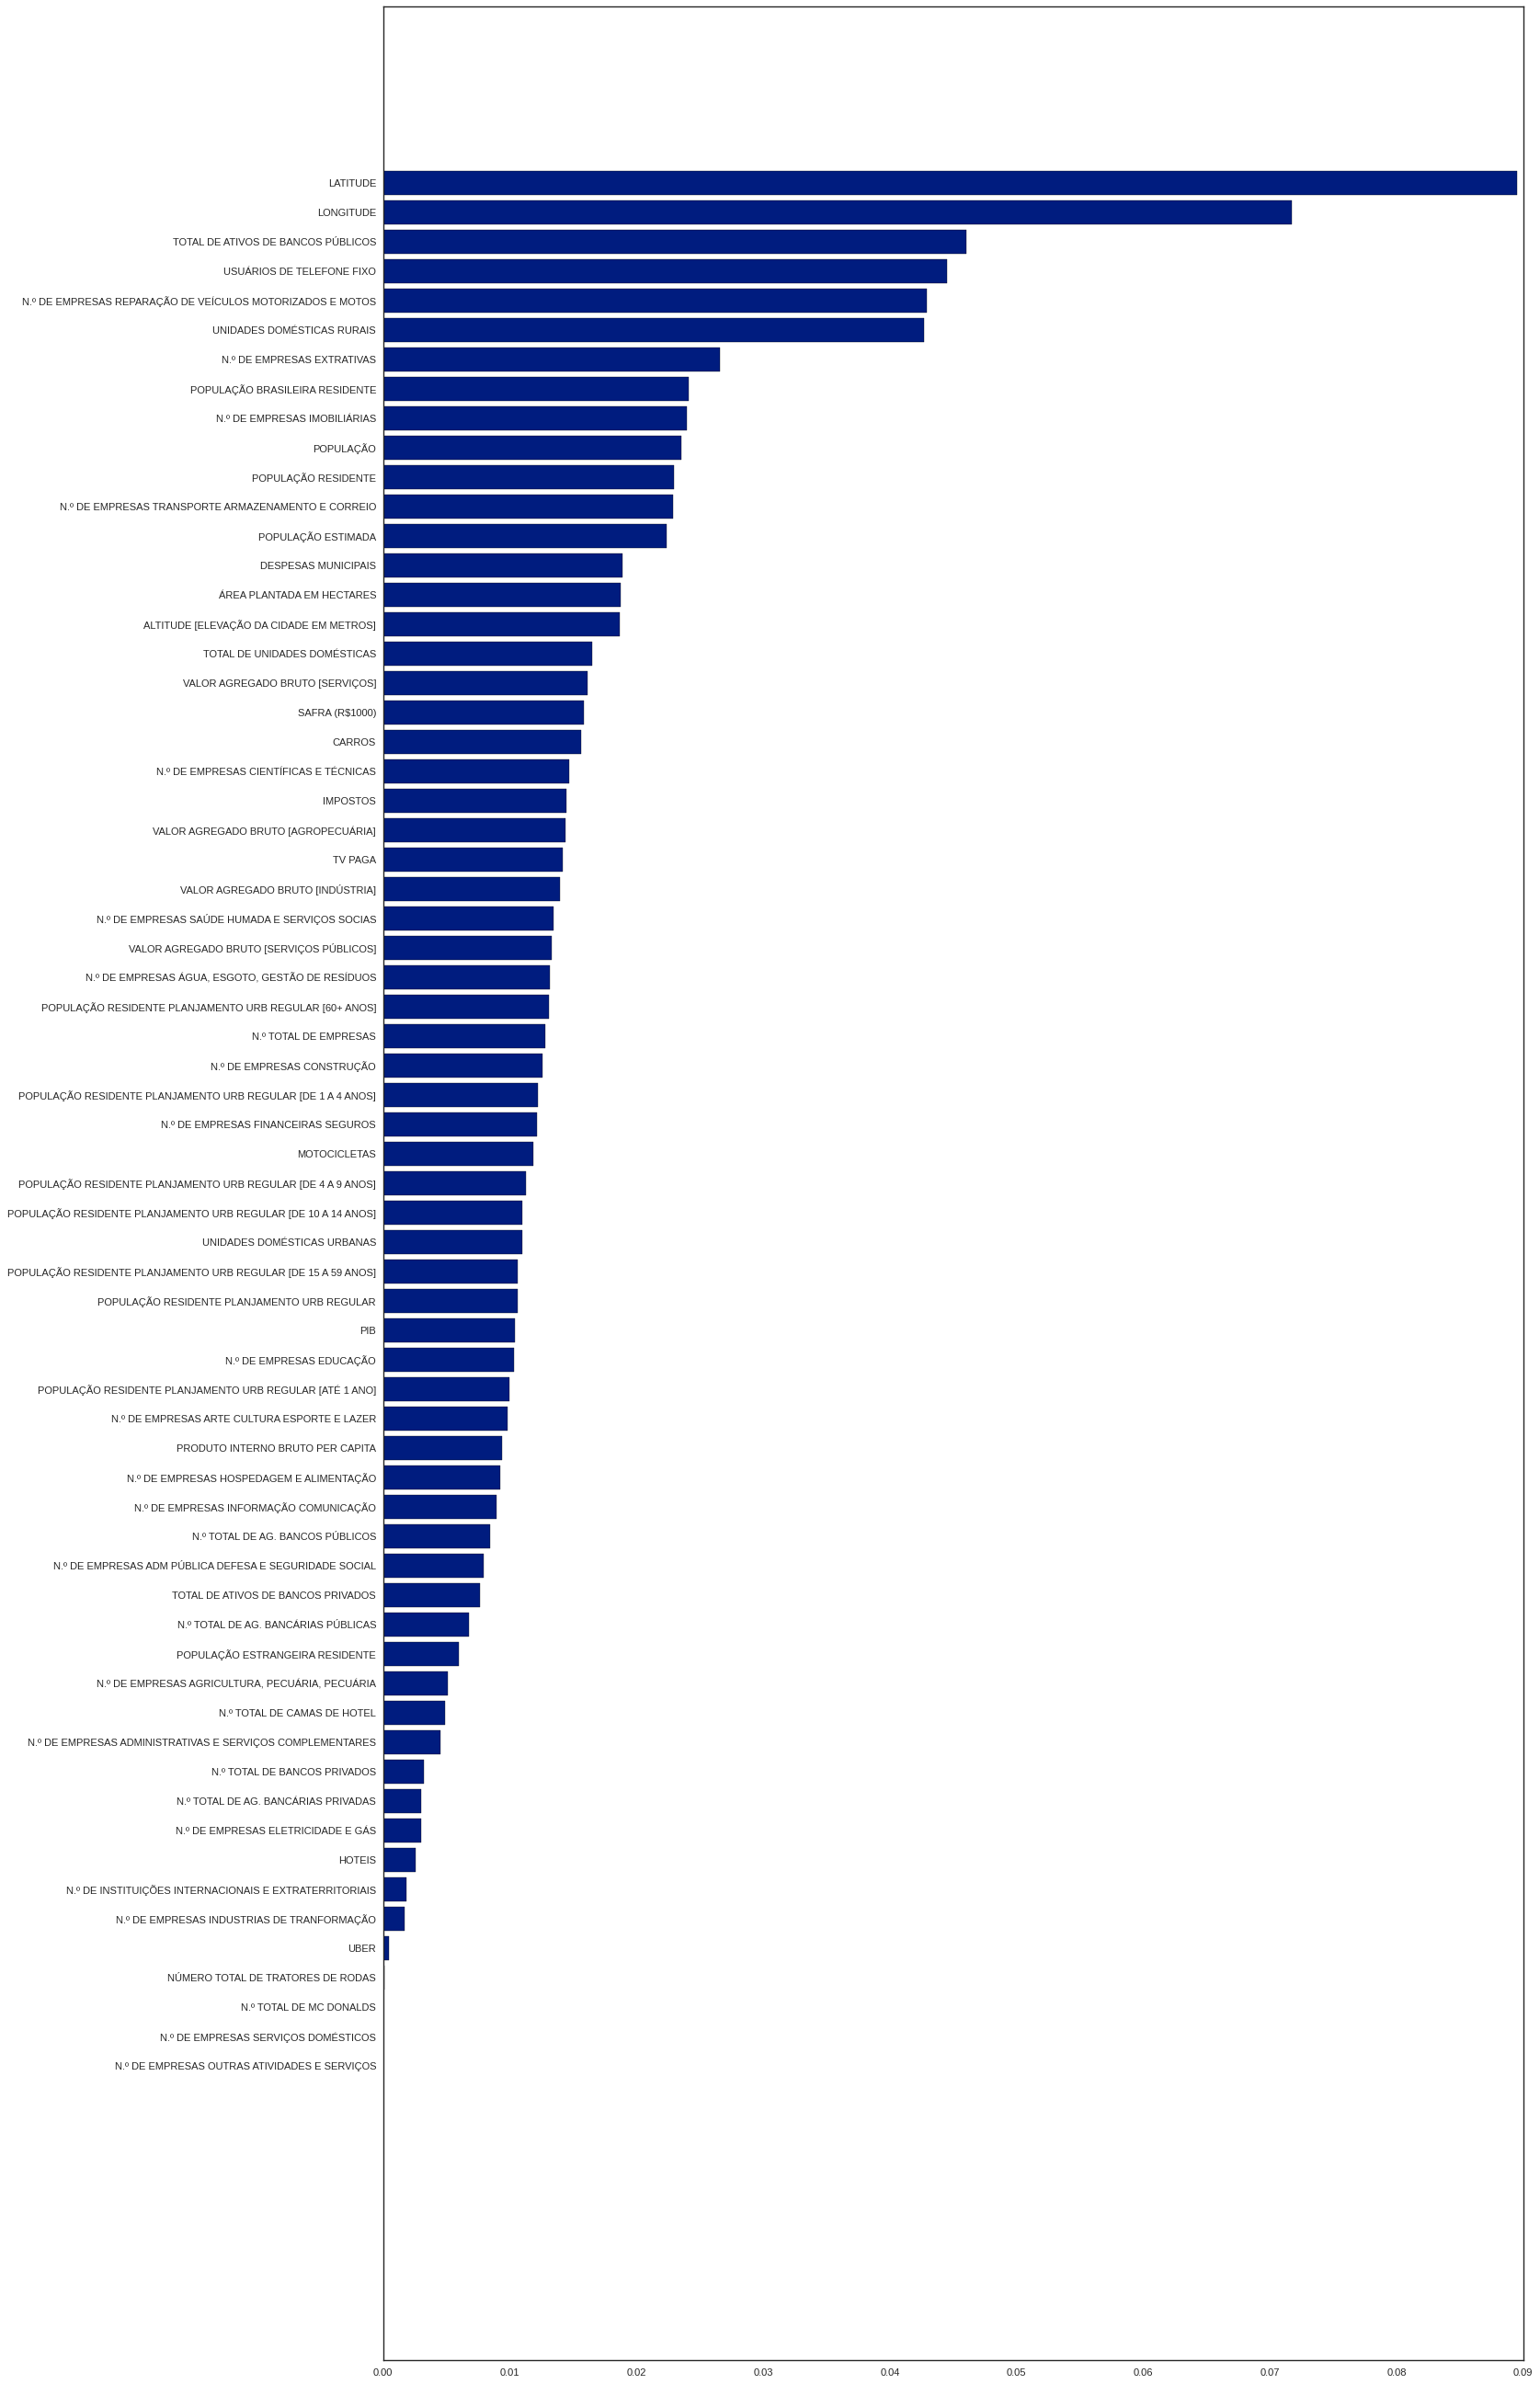

In [53]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]


importances = model.feature_importances_
indices = np.argsort(importances)

plt.style.use('seaborn-dark-palette')
plt.rc('font', size=20)  
plt.figure(figsize=(20, 40))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.show()




## Acuracia, recall e precisão

In [8]:
acuracia, recall, precisao= metrics(y_test,y_pred)
stringSaida= "acuracia = {ac} , recall = {rec} , precisao = {prec} ".format (ac = acuracia, rec = recall, prec = precisao)
print (stringSaida)

acuracia = 0.7942583732057417 , recall = 0.7942583732057417 , precisao = 0.7942607262497031 


## Matriz de confusão

In [9]:
confusion_matrix(y_test, y_pred)

array([[552,   0,   5,   0,  68],
       [  0, 267,   0,   0,  97],
       [ 11,   0,   4,   0,   0],
       [  0,  10,   1,   1,   2],
       [ 91,  59,   0,   0, 504]])

# Balanceamento de classes

Ao utilizar a estratégia acima, temos uma precisão média de 0.79. Porém nosso resultado de precisão na classe que representa IDH médio é de 0.40, o que é considerada uma baixa precisão,como mostrado a baixo: 

In [10]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        alto       0.84      0.88      0.86       625
       baixo       0.79      0.73      0.76       364
  muito_alto       0.40      0.27      0.32        15
 muito_baixo       1.00      0.07      0.13        14
       médio       0.75      0.77      0.76       654

    accuracy                           0.79      1672
   macro avg       0.76      0.55      0.57      1672
weighted avg       0.79      0.79      0.79      1672



### Vamos aplicar a técnica de Oversampling para conseguirmos balancear as classes

O exemplo abaixo mostra a grande diferença de quantidade de atributos que compõe cada classe: 

<AxesSubplot:xlabel='rótulo', ylabel='count'>

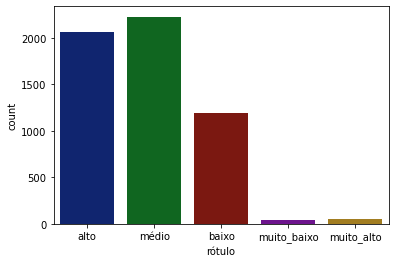

In [11]:
plt.rc('font', size=10)  
sns.countplot(df["rótulo"])

### With Stratified Shuffle Split

Antes de aplicar o OverSampling, vamos fazer uma divisão aletória nos dados de treino

In [12]:
X = df.iloc[:, 0:65].values
y = df.iloc[:, 66].values

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
sss.get_n_splits(X, y)

for train_index, test_index in sss.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

### Usando oversampling

In [13]:
from imblearn.over_sampling import RandomOverSampler


ros = RandomOverSampler('minority')
X_ros, y_ros = ros.fit_resample(X_train, y_train)

In [14]:
from sklearn.ensemble import RandomForestClassifier

#100 árvores
model2 = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')

model2.fit(X_ros, y_ros)
y_pred2 = model.predict(X_test)
model2.score(X_test, y_test)

0.7865470852017937

### Os resultados de precisão, recall e f1 score são melhores

In [15]:

print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

        alto       0.94      0.97      0.96       414
       baixo       0.92      0.90      0.91       237
  muito_alto       1.00      0.70      0.82        10
 muito_baixo       1.00      0.78      0.88         9
       médio       0.92      0.91      0.92       445

    accuracy                           0.93      1115
   macro avg       0.96      0.85      0.90      1115
weighted avg       0.93      0.93      0.93      1115



### Acurácia o recall e a precisão também aumetarem

In [16]:
acuracia, recall, precisao= metrics(y_test,y_pred2)
stringSaida= "acuracia = {ac} , recall = {rec} , precisao = {prec} ".format (ac = acuracia, rec = recall, prec = precisao)
print (stringSaida)

acuracia = 0.9291479820627803 , recall = 0.9291479820627803 , precisao = 0.9292635418797259 


# A importancia de cada feature também sofre alteração

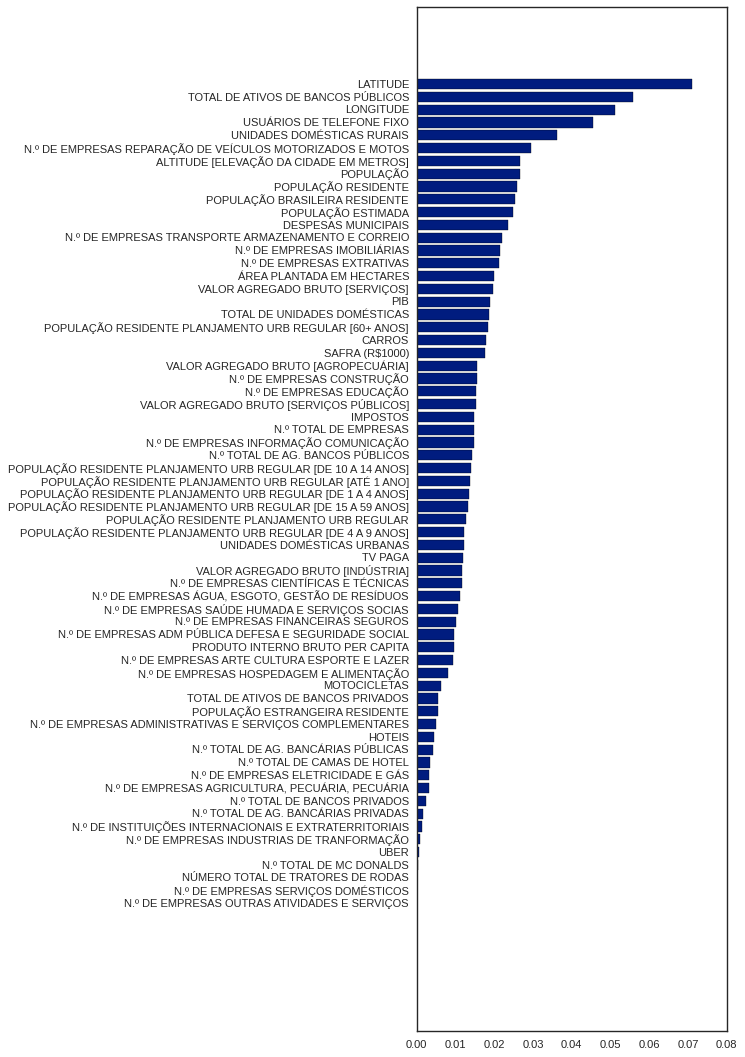

In [72]:
importances = model2.feature_importances_
std = np.std([tree.feature_importances_ for tree in model2.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
importances = model2.feature_importances_
indices = np.argsort(importances)

plt.style.use('seaborn-white')
plt.rc('font', size=10)  
plt.figure(figsize=(5, 16))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.show()

## Matriz de confusão

In [20]:
array = confusion_matrix(y_test, y_pred2)

<AxesSubplot:>

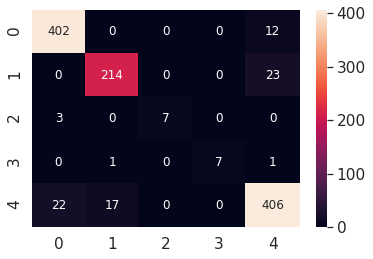

In [22]:
df_cm = pd.DataFrame(array, range(5),
                  range(5))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 12}, fmt='g')# font size

#### 